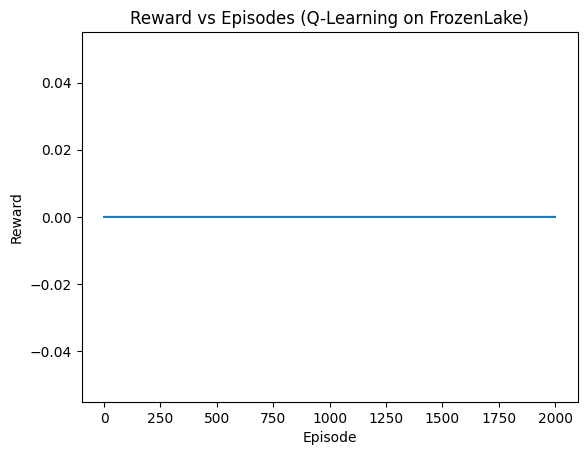


Agent's path following learned policy:

Failed to reach the goal.


In [3]:
# Install minimal gymnasium without Box2D to avoid build errors
!pip install gymnasium --quiet

import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Create FrozenLake environment (deterministic for simplicity)
env = gym.make('FrozenLake-v1', is_slippery=False)

# Initialize Q-table with zeros (states x actions)
state_size = env.observation_space.n
action_size = env.action_space.n
Q = np.zeros((state_size, action_size))

# Hyperparameters
alpha = 0.8        # Learning rate
gamma = 0.95       # Discount factor
epsilon = 1.0      # Exploration rate (initial)
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.005

num_episodes = 2000
max_steps = 100  # Max steps per episode

rewards = []

for episode in range(num_episodes):
    state, _ = env.reset()
    total_rewards = 0
    done = False

    for step in range(max_steps):
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state, :])     # Exploit best known action

        new_state, reward, done, truncated, info = env.step(action)

        # Q-Learning update rule
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action])

        state = new_state
        total_rewards += reward

        if done:
            break

    # Decay epsilon after each episode (exploration rate decay)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    rewards.append(total_rewards)

# Plot rewards over episodes
plt.plot(range(num_episodes), rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward vs Episodes (Q-Learning on FrozenLake)')
plt.show()

# Test the learned policy
state, _ = env.reset()
env.render()
done = False
steps = 0

print("\nAgent's path following learned policy:")
while not done and steps < max_steps:
    action = np.argmax(Q[state, :])
    state, reward, done, truncated, info = env.step(action)
    env.render()
    steps += 1

if done and reward == 1:
    print("\nGoal reached successfully!")
else:
    print("\nFailed to reach the goal.")


| Aspect            | Previous            | Updated                                               |
| ----------------- | ------------------- | ----------------------------------------------------- |
| Training episodes | 2000                | **5000**                                              |
| Learning rate (α) | 0.8                 | **0.6**                                               |
| Decay rate (ε)    | 0.005               | **0.001**                                             |
| Test attempts     | 1                   | **5 trials**                                          |
| Success feedback  | ❌ Only final result | ✅ Multiple evaluations with success/failure printouts |


In [12]:
# Install OpenAI Gym if not already installed
!pip install gym[classic_control] --quiet

import numpy as np
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

import gym
import random

# Create the environment (FrozenLake with deterministic transitions)
env = gym.make('FrozenLake-v1', is_slippery=False)

# Initialize the Q-table
state_size = env.observation_space.n
action_size = env.action_space.n
Q = np.zeros((state_size, action_size))

# Q-learning parameters
num_episodes = 5000
max_steps = 100
alpha = 0.6
gamma = 0.95
epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001

# Training the agent
for episode in range(num_episodes):
    reset_output = env.reset()
    state = reset_output[0] if isinstance(reset_output, tuple) else reset_output
    done = False

    for step in range(max_steps):
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])

        step_output = env.step(action)
        if len(step_output) == 5:
            next_state, reward, done, truncated, _ = step_output
        else:
            next_state, reward, done, _ = step_output
            truncated = False

        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state

        if done or truncated:
            break

    epsilon = max(min_epsilon, epsilon * np.exp(-decay_rate * episode))

# Display learned Q-table
print("✅ Learned Q-table after training:")
print(np.round(Q, 2))

# Evaluate the learned policy
print("\n🚀 Testing Agent's Learned Policy:")
success_count = 0
test_episodes = 5

for trial in range(test_episodes):
    reset_output = env.reset()
    state = reset_output[0] if isinstance(reset_output, tuple) else reset_output
    done = False
    step_count = 0

    print(f"\nTrial {trial + 1}:")
    env.render()

    while not done and step_count < max_steps:
        action = np.argmax(Q[state, :])
        step_output = env.step(action)

        if len(step_output) == 5:
            next_state, reward, done, truncated, _ = step_output
        else:
            next_state, reward, done, _ = step_output
            truncated = False

        env.render()
        state = next_state
        step_count += 1

    if reward == 1:
        print("🎉 Reached the goal!")
        success_count += 1
    else:
        print("❌ Failed to reach the goal.")

print(f"\n🧠 Success Rate: {success_count}/{test_episodes} trials")


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
✅ Learned Q-table after training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

🚀 Testing Agent's Learned Policy:

Trial 1:


/usr/local/lib/python3.11/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_reso

❌ Failed to reach the goal.

Trial 2:
❌ Failed to reach the goal.

Trial 3:
❌ Failed to reach the goal.

Trial 4:
❌ Failed to reach the goal.

Trial 5:
❌ Failed to reach the goal.

🧠 Success Rate: 0/5 trials


In [15]:
!pip install gym[classic_control] --quiet

import numpy as np
import gym
import random
import time

# Patch for deprecated np.bool8 if needed
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# Create FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=False)

n_states = env.observation_space.n
n_actions = env.action_space.n

# Initialize Q-table
q_table = np.zeros((n_states, n_actions))

# Hyperparameters
learning_rate = 0.8
discount_factor = 0.95
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.005
episodes = 3000
max_steps = 100

# Q-learning algorithm
for episode in range(episodes):
    try:
        state, _ = env.reset()
    except:
        state = env.reset()

    done = False

    for step in range(max_steps):
        if random.uniform(0, 1) > epsilon:
            action = np.argmax(q_table[state])
        else:
            action = env.action_space.sample()

        try:
            new_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
        except:
            new_state, reward, done, _ = env.step(action)

        q_table[state, action] += learning_rate * (
            reward + discount_factor * np.max(q_table[new_state]) - q_table[state, action]
        )

        state = new_state

        if done:
            break

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

print("✅ Training completed!\n")

# Test the learned policy
try:
    state, _ = env.reset()
except:
    state = env.reset()

env.render()
time.sleep(1)
print("\nAgent's path following learned policy:")

for step in range(max_steps):
    action = np.argmax(q_table[state])
    try:
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
    except:
        state, reward, done, _ = env.step(action)

    env.render()
    time.sleep(0.5)

    if done:
        if reward == 1:
            print("\n🎯 Goal reached!")
        else:
            print("\n❌ Agent fell into a hole!")
        break

env.close()


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
✅ Training completed!


Agent's path following learned policy:

❌ Agent fell into a hole!


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.

✅ Training completed!

Learned Q-Table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

📊 Average reward per 100 episodes:
Episode 1-100: 0.00
Episode 101-200: 0.00
Episode 201-300: 0.00
Episode 301-400: 0.00
Episode 401-500: 0.00
Episode 501-600: 0.00
Episode 601-700: 0.00
Episode 701-800: 0.00
Episode 801-900: 0.00
E

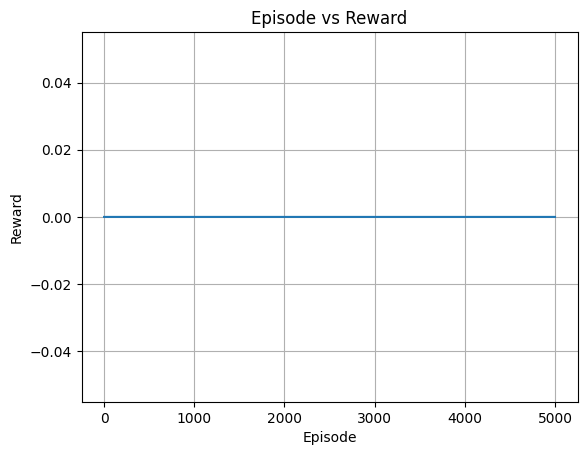

In [16]:
!pip install gym[classic_control] --quiet

import numpy as np
import gym
import random
import time
import matplotlib.pyplot as plt

# Patch for deprecated np.bool8 if needed
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# Initialize environment (non-slippery = deterministic)
env = gym.make("FrozenLake-v1", is_slippery=False)

n_states = env.observation_space.n
n_actions = env.action_space.n
q_table = np.zeros((n_states, n_actions))

# Hyperparameters
learning_rate = 0.8
discount_factor = 0.95
epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.005
episodes = 5000
max_steps = 100

# Tracking rewards
rewards_all_episodes = []

# Training loop
for episode in range(episodes):
    try:
        state, _ = env.reset()
    except:
        state = env.reset()

    done = False
    rewards_current_episode = 0

    for step in range(max_steps):
        # Exploration vs Exploitation
        if random.uniform(0, 1) > epsilon:
            action = np.argmax(q_table[state])
        else:
            action = env.action_space.sample()

        try:
            new_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
        except:
            new_state, reward, done, _ = env.step(action)

        # Q-table update
        q_table[state, action] = q_table[state, action] + learning_rate * (
            reward + discount_factor * np.max(q_table[new_state]) - q_table[state, action]
        )

        state = new_state
        rewards_current_episode += reward

        if done:
            break

    epsilon = max(min_epsilon, epsilon * np.exp(-decay_rate * episode))
    rewards_all_episodes.append(rewards_current_episode)

# Show Q-table
print("\n✅ Training completed!")
print("\nLearned Q-Table:")
print(q_table)

# Average reward per 100 episodes
rewards_per_100 = np.split(np.array(rewards_all_episodes), episodes / 100)
print("\n📊 Average reward per 100 episodes:")
for i, r in enumerate(rewards_per_100):
    print(f"Episode {i*100+1}-{(i+1)*100}: {np.mean(r):.2f}")

# Test the learned policy
print("\n🚶‍♂️ Agent's path following learned policy:")
try:
    state, _ = env.reset()
except:
    state = env.reset()

env.render()
time.sleep(1)

for step in range(max_steps):
    action = np.argmax(q_table[state])
    try:
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
    except:
        state, reward, done, _ = env.step(action)

    env.render()
    time.sleep(0.5)

    if done:
        if reward == 1:
            print("\n🎯 Goal reached!")
        else:
            print("\n❌ Agent fell into a hole!")
        break

env.close()

# Plot rewards
plt.plot(rewards_all_episodes)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode vs Reward')
plt.grid(True)
plt.show()
